# Adrienne Smith - Unit 7  Tweeter Sentiment Analysis

In [20]:
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import requests
import scipy

from pprint import pprint

import time
from datetime import datetime

from matplotlib import style
style.use('ggplot')

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key = "3REpngub1g5pFnxOrmFy7RA7u"
consumer_secret = "B8Z6Qp4NsxDsEblyUwTqrQAd4CoCMAPkM9R8a81tGrOcy5fwwm"
access_token = "338862045-4oYBBr7iESvJCw7u9KEhUxBFIdSmMGwi9sohBk5z"
access_token_secret = "yQHd23XHo5iIrhFuVdJLq2aXgT4kHbV2BK7sNvz5X2fKc"
api_key="24c85411d38cdd9b4b1601ca2a92276d"


In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
target_user = ['@BBCNews', '@CBSNews', '@CNN', '@FoxNews', '@NYTimes']

In [6]:
filename = ["BBC_sentiment", "CBS_sentiment", "CNN_sentiment", "Fox_sentiment", "NYTimes_sentiment"]

In [7]:
# Create empty lists to store appended data 
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

media_sources = []
text = []
date = []
tweets_ago = []

In [8]:
# Looping thru users
for user in target_user:
    
    # initiatlize counter
    tweet_count = 0

    # Get the last 100 tweets 5 pages at 20 twteets per page
    for x in range(5):
        
        public_tweets = api.user_timeline(user, page=x)

        # Loop thru tweets
        for tweet in public_tweets:
        
            # Incrementing counter
            tweet_count += 1
    
            # Adding values to list
            media_sources.append(user)
            text.append(tweet['text'])
            date.append(tweet['created_at'])
            tweets_ago.append(tweet_count)
    
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            neutral_list.append(neu)
            negative_list.append(neg)

In [35]:
# Creating the DataFrame
News_df = pd.DataFrame({
    "Media Source": media_sources,
    "Tweet": text, 
    "Date / Time": date,
    "Compound Score": compound_list, 
    "Positive Score": positive_list,
    "Neutral Score": neutral_list, 
    "Negative Score": negative_list,
    "Tweets Ago": tweets_ago})

NewsData = News_df[["Media Source",
                   "Tweet",
                   "Date / Time", 
                   "Compound Score",
                   "Positive Score", 
                   "Negative Score",
                    "Neutral Score", 
                   "Tweets Ago"]]


News_df.head()

,Media Source,Tweet,Date / Time,Compound Score,Positive Score,Neutral Score,Negative Score,Tweets Ago
0,@BBCNews,Newspaper headlines: Mental health checks for ...,Tue Oct 09 23:08:03 +0000 2018,0.0000,0.000,1.000,0.000,1
1,@BBCNews,Drew Barrymore: EgyptAir's magazine sorry for ...,Tue Oct 09 22:36:17 +0000 2018,-0.0772,0.000,0.860,0.140,2
2,@BBCNews,Billy Joe Saunders: WBO middleweight champion ...,Tue Oct 09 21:50:57 +0000 2018,0.2500,0.219,0.618,0.163,3
3,@BBCNews,"Wednesday's Times: ""A third of under-25s now d...",Tue Oct 09 21:30:20 +0000 2018,-0.2960,0.000,0.855,0.145,4
4,@BBCNews,"Wednesday's Guardian: ""Tory benefit cuts will ...",Tue Oct 09 21:30:17 +0000 2018,-0.2500,0.225,0.505,0.271,5


In [36]:
News_df.tail()

,Media Source,Tweet,Date / Time,Compound Score,Positive Score,Neutral Score,Negative Score,Tweets Ago
495,@NYTimes,A group of investigative journalists and resea...,Tue Oct 09 07:00:17 +0000 2018,0.0000,0.000,1.000,0.0,96
496,@NYTimes,"The New York Yankees and their new manager, Aa...",Tue Oct 09 06:45:02 +0000 2018,0.0000,0.000,1.000,0.0,97
497,@NYTimes,America’s highest ranking Marine Corps officer...,Tue Oct 09 06:30:04 +0000 2018,0.3818,0.126,0.874,0.0,98
498,@NYTimes,What the world needs now? Handwritten cards an...,Tue Oct 09 06:15:07 +0000 2018,0.0000,0.000,1.000,0.0,99
499,@NYTimes,RT @stevenleemyers: More on the stunning fall ...,Tue Oct 09 06:05:27 +0000 2018,0.4336,0.125,0.875,0.0,100


In [54]:
News_df.to_csv(r'C:/Users/Adrienne/Desktop/NewsData.csv')

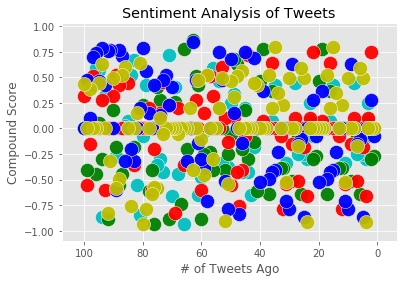

In [49]:
x = np.arange(0, 100, -1)

BBC = NewsData.loc[NewsData["Media Source"] == "@BBCNews"]
CBS = NewsData.loc[NewsData["Media Source"] == "@CBSNews"]
CNN = NewsData.loc[NewsData["Media Source"] == "@CNN"]
FOX = NewsData.loc[NewsData["Media Source"] == "@FoxNews"]
NYT = NewsData.loc[NewsData["Media Source"] == "@NYTimes"]

# Create scatter plots
plt.scatter(BBC['Tweets Ago'], BBC['Compound Score'], c='c',edgecolor='w', s=200, alpha=0.95, label='BBCNews')
plt.scatter(CBS['Tweets Ago'], CBS['Compound Score'], c='g',edgecolor='w', s=200, alpha=0.95, label='CBSNews')
plt.scatter(CNN['Tweets Ago'], CNN['Compound Score'], c='r',edgecolor='w', s=200, alpha=0.95, label='CNNNews')
plt.scatter(FOX['Tweets Ago'], FOX['Compound Score'], c='b',edgecolor='w', s=200, alpha=0.95, label='FOXNews')
plt.scatter(NYT['Tweets Ago'], NYT['Compound Score'], c='y',edgecolor='w', s=200, alpha=0.95, label='NYTimes')





plt.xlabel('# of Tweets Ago')
plt.ylabel('Compound Score')

plt.gca().invert_xaxis()
plt.title('Sentiment Analysis of Tweets')

plt.savefig('News Scatter_plot.png', bbox_inches='tight')
plt.show()

In [50]:
 # Average Sentiment
    
AvgBBC = np.mean(BBC['Compound Score'])
AvgCBS = np.mean(CBS['Compound Score'])
AvgCNN = np.mean(CNN['Compound Score'])
AvgFOX = np.mean(FOX['Compound Score'])
AvgNYT = np.mean(NYT['Compound Score'])
print(AvgNYT)
    

0.03801000000000001


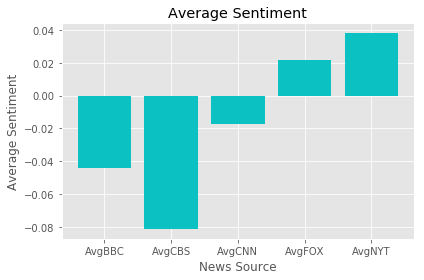

In [51]:


AvgSent= [AvgBBC,AvgCBS, AvgCNN, AvgFOX, AvgNYT]
x_axis=np.arange (len(AvgSent))
plt.bar(x_axis, AvgSent, color='c', alpha=0.95, align="center")
plt.title('Average Sentiment')
plt.xlabel('News Source')
plt.ylabel('Average Sentiment')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["AvgBBC", "AvgCBS", "AvgCNN", "AvgFOX", "AvgNYT"])
plt.savefig('Sentiment_Avg.png')
plt.tight_layout()
plt.show()